# Introduction to Scikit-Learn (sklearn)
This notebook goes through a range of common and useful featues of the Scikit-Learn library.

# What is Scikit-Learn (sklearn)?

**Scikit-Learn:** https://scikit-learn.org/stable/index.html, 
also referred to as sklearn, is an open-source Python machine learning library.
It's built on top on NumPy (Python library for numerical computing) and Matplotlib (Python library for data visualization).

**documenation:** https://scikit-learn.org/stable/user_guide.html


![](../images/scikit-learn.png)

# What does this notebook cover?
The Scikit-Learn library is very capable. However, learning everything off by heart isn't necessary. Instead, this notebook focuses some of the main use cases of the library.

More specifically, we'll cover:

* 0.An end-to-end Scikit-Learn worfklow
* 1.Getting the data ready
* 2.Choosing the right maching learning estimator/aglorithm/model for your problem
* 3.Fitting your chosen machine learning model to data and using it to make a prediction
* 4.Evaluting a machine learning model
* 5.Improving predictions through experimentation (hyperparameter tuning)
* 6.Saving and loading a pretrained model
* 7.Putting it all together in a pipeline

![](../images/A-Scikit-Lear-workflow.png)

In [14]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 0. An end-to-end Scikit-Learn workflow

Before we get in-depth, let's quickly check out what an end-to-end Scikit-Learn workflow might look like.

Once we've seen an end-to-end workflow, we'll dive into each step a little deeper.

Specifically, we'll get hands-on with the following steps:

* 1.Getting data ready (split into features and labels, prepare train and test steps)
* 2.Choosing a model for our problem
* 3.Fit the model to the data and use it to make a prediction
* 4.Evaluate the model
* 5.Experiment to improve
* 6.Save a model for someone else to use

Note:** The following section is a bit information heavy but it is an end-to-end workflow. We'll go through it quite swiftly but we'll break it down more throughout the rest of the notebook. And since Scikit-Learn is such a vast library, capable of tackling many problems, the workflow we're using is only one example of how you can use it.

### Random Forest Classifier Workflow for Classifying Heart Disease

#### 1. Get the data ready

As an example dataset, we'll import heart-disease.csv.

This file contains anonymised patient medical records and whether or not they have heart disease or not (this is a classification problem since we're trying to predict whether something is one thing or another).

In [15]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv('../data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

### 2. Choose the model and hyperparameters
Choosing a model often depends on the type of problem you're working on.

For example, there are different models that Scikit-Learn recommends whether you're working on a classification or regression problem.

You can see a map breaking down the different kinds of model options and recommendations in the Scikit-Learn documentation.

Scikit-Learn refers to models as "estimators", however, they are often also referred to as model or clf (short for classifier).

A model's hyperparameters are settings you can change to adjust it for your problem, much like knobs on an oven you can tune to cook your favourite dish.

In [17]:
# 2. Choose the right model and hyperparameters
# Since we're working on a classification problem, we'll start with a RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### 3. Fit the model to the data and use it to make a prediction
Fitting a model a dataset involves passing it the data and asking it to figure out the patterns.

If there are labels (supervised learning), the model tries to work out the relationship between the data and the labels.

If there are no labels (unsupervised learning), the model tries to find patterns and group similar samples together.

Most Scikit-Learn models have the fit(X, y) method built-in, where the X parameter is the features and the y parameter is the labels.

In our case, we start by fitting a model on the training split (X_train, y_train).

In [27]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

# test_size=0.2 indicates we are using 20% of the data for test size, and the rest for training (80%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [28]:
# fit the model to the data
clf.fit(X_train, y_train);

In [29]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2


In [30]:
# make a predciton
y_label = clf.predict(np.array[0, 2, 3 ,4])

TypeError: 'builtin_function_or_method' object is not subscriptable

In [33]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [34]:
y_test

282    0
158    1
122    1
235    0
267    0
      ..
19     1
227    0
171    0
181    0
164    1
Name: target, Length: 61, dtype: int64

#### 4. Evaluate the model
Now we've made some predictions, we can start to use some more Scikit-Learn methods to figure out how good our model is.

Each model or estimator has a built-in score() method.

This method compares how well the model was able to learn the patterns between the features and labels.

The score() method for each model uses a standard evaluation metric to measure your model's results.

In the case of a classifier (our model), one of the most common evaluation metrics is accuracy (the fraction of correct predictions out of total predictions).

Let's check out our model's accuracy on the training set.

In [35]:
# Evaluate the model on trianing data and test data 
clf.score(X_train, y_train)

1.0

In [36]:
clf.score(X_test, y_test)

0.8032786885245902

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
           1       0.81      0.85      0.83        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



#### 5. Experiment to improve
The first model you build is often referred to as a baseline (a baseline is often even simpler than the model we've used, a baseline could be "let's just by default predict the most common value and then try to improve").

Once you've got a baseline model, like we have here, it's important to remember, this is often not the final model you'll use.

The next step in the workflow is to try and improve upon your baseline model.

How?

With one of the most important mottos in machine learning...

Experiment, experiment, experiment!

Experiments can come in many different forms.

But let's break it into two.

From a model perspective.
From a data perspective.
From a model perspective may involve things such as using a more complex model or tuning your models hyperparameters.

From a data perspective may involve collecting more data or better quality data so your existing model has more of a chance to learn the patterns within.

If you're already working on an existing dataset, it's often easier try a series of model perspective experiments first and then turn to data perspective experiments if you aren't getting the results you're looking for.

One thing you should be aware of is if you're tuning a models hyperparameters in a series of experiments, your reuslts should always be cross-validated (we'll see this later on!).

Cross-validation is a way of making sure the results you're getting are consistent across your training and test datasets (because it uses multiple versions of training and test sets) rather than just luck because of the order the original training and test sets were created.

Try different hyperparameters.
All different parameters should be cross-validated.
Note: Beware of cross-validation for time series problems (as for time series, you don't want to mix samples from the future with samples from the past).
Different models you use will have different hyperparameters you can tune.

For the case of our model, the RandomForestClassifier(), we'll start trying different values for n_estimators (a measure for the number of trees in the random forest).

By default, n_estimators=100, so how about we try values from 100 to 200 and see what happens (generally more is better)?

In [38]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10): 
    print(f"Trying model with {i} estimators...")
    
    # learns on the train data 
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    
    # tests on the test data
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 83.61%

Trying model with 20 estimators...
Model accuracy on test set: 83.61%

Trying model with 30 estimators...
Model accuracy on test set: 81.97%

Trying model with 40 estimators...
Model accuracy on test set: 85.25%

Trying model with 50 estimators...
Model accuracy on test set: 80.33%

Trying model with 60 estimators...
Model accuracy on test set: 83.61%

Trying model with 70 estimators...
Model accuracy on test set: 81.97%

Trying model with 80 estimators...
Model accuracy on test set: 83.61%

Trying model with 90 estimators...
Model accuracy on test set: 83.61%



In [39]:
# 6. Save a model and load it
import pickle

# write to a binary file with wb paramater
pickle.dump(clf, open("random_forest_model_1.pkl", "wb")) 

In [40]:
# load the model 

# read a binary file with rb paramater
loaded_model = pickle.load(open("random_forst_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.9836065573770492

# 1. Getting the data ready to be sued with machine learning 
Data doesn't always come ready to use with a Scikit-Learn machine learning model.

Three of the main things we have to do: 
* 1. Split the data into features and lables (usually 'X' and 'y')
* 2. Filling (also called imputing or disregarding missing values
* 3. Converting non-numerical values to numerical values (feature encoding) 

In [41]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Splitting the data into features (X) and labels (y)

In [42]:
# Splitting the data into features (X) and labels (y)

# drops the target column 
X = heart_disease.drop("target", axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [43]:
# y will be the target column 
y = heart_disease['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

Beautiful, 303 labels with values of 0 (no heart disease) and 1 (heart disease).

Now let's split our data into training and test sets, we'll use an 80/20 split (80% of samples for training and 20% of samples for testing).

#### Splitting the data into training and test sets 

In [44]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

# Check the shapes of different data splits
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [45]:
# total data
X.shape

(303, 13)

In [46]:
# 80% of data is being used for the training set (the model will learn patterns on these samples)
X.shape[0] * 0.8

242.4

In [47]:
# And 20% of the data is being used for the testing set (the model will be evaluated on these samples)
X.shape[0] * 0.2

60.6

In [48]:
# total data 
242.4 + 60.6

303.0

In [49]:
len(heart_disease)

303

#### 1.1 Make sure it's all numerical
Computers love numbers.

So one thing you'll often have to make sure of is that your datasets are in numerical form.

This even goes for datasets which contain non-numerical features that you may want to include in a model.

For example, if we were working with a car sales dataset, how might we turn features such as Make and Colour into numbers?

Let's figure it out.

First, we'll import the car-sales-extended.csv dataset.

In [50]:
# Import car-sales-extended.csv
car_sales = pd.read_csv("../data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [51]:
len(car_sales)

1000

In [52]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

Notice the Make and Colour features are of dtype=object (they're strings) where as the rest of the columns are of dtype=int64.

If we want to use the Make and Colour features in our model, we'll need to figure out how to turn them into numerical form.

In [53]:
# Split into X and y and train/test
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)


Now let's try and build a model on our car_sales data.

In [54]:
# Try to predict with random forest on price column (doesn't work)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()  # creates a model
model.fit(X_train, y_train) # learns the patterns on the training data 
model.score(X_test, y_test) # evaluates on the test data 

ValueError: could not convert string to float: 'Toyota'

In [55]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [56]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [57]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [58]:
# we have transformed Make, Colour and Doors into numbers 
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


Wonderful, now let's use pd.get_dummies() to turn our categorical variables into one-hot encoded variables.

In [59]:
# Another way to do it with pd.dummies...

# One-hot encode categorical variables
categorical_variables = ["Make", "Colour", "Doors"]
dummies = pd.get_dummies(data=car_sales[categorical_variables])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


Notice how there's a new column for each categorical option (e.g. Make_BMW, Make_Honda, etc).

But also notice how it also missed the Doors column?

This is because Doors is already numeric, so for pd.get_dummies() to work on it, we can change it to type object.

By default, pd.get_dummies() also turns all of the values to bools (True or False).

We can get the returned values as 0 or 1 by setting dtype=int.

In [60]:
# Have to convert doors to object for dummies to work on it...
car_sales["Doors"] = car_sales["Doors"].astype(object)
dummies = pd.get_dummies(data=car_sales[["Make", "Colour", "Doors"]],
                         dtype=int)
dummies

,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3,Doors_4,Doors_5
0,0,1,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,1,0
3,0,0,0,1,0,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,1,0,0,0,0,0,1,0
996,0,0,1,0,0,0,0,0,1,1,0,0
997,0,0,1,0,0,1,0,0,0,0,1,0
998,0,1,0,0,0,0,0,0,1,0,1,0


We've now turned our data into fully numeric form using Scikit-Learn and pandas.

Now you might be wondering...

Should you use Scikit-Learn or pandas for turning data into numerical form?

And the answer is either.

But as a rule of thumb:

* If you're performing quick data analysis and running small modelling experiments, use pandas as it's generally quite fast to get up and running.
* If you're performing a larger scale modelling experiment or would like to put your data processing steps into a
  production pipeline, I'd recommend leaning towards Scikit-Learn, specifically a Scikit-Learn Pipeline (chaining
  together multiple estimator/modelling steps).

Since we've turned our data into numerical form, how about we try and fit our model again?

Let's recreate a train/test split except this time we'll use transformed_X instead of X.

In [62]:
# Let's refit the model 
np.random.seed(42)

# create train and test splits with transformed_X
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

# Create the model instance
model = RandomForestRegressor()

# Fit the model on the numerical data (this errored before since our data wasn't fully numeric)
model.fit(X_train, y_train)

# Score the model (reurns r^2 metric by default, also called coefficient of determination, higher is better)
model.score(X_test, y_test)


0.3235867221569877

#### 1.2 What if there were missing values in the data?
Holes in the data means holes in the patterns your machine learning model can learn.

Many machine learning models don't work well or produce errors when they're used on datasets with missing values.

A missing value can appear as a blank, as a NaN or something similar.

There are two main options when dealing with missing values:

1. ***Fill them with some given or calculated value (imputation)** - For example, you might fill missing values of a numerical column with the mean of all the other values. The practice of calculating or figuring out how to fill missing values in a dataset is called imputing. For a great resource on imputing missing values, I'd recommend refering to the Scikit-Learn user guide.
2. ***Remove them** - If a row or sample has missing values, you may opt to remove them from your dataset completely. However, this potentially results in using less data to build your model.

    **Note:** Dealing with missing values differs from problem to problem, meaning there's no 100% best way to fill
    missing values across datasets and problem types. It will often take careful experimentation and practice to
    figure out the best way to deal with missing values in your own datasets.

To practice dealing with missing values, let's import a version of the car_sales dataset with several missing values.

In [63]:
# Import car sales dataframe with missing values
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


If you're dataset is large, it's likely you aren't going to go through it sample by sample to find the missing values.

Luckily, pandas has a method called pd.DataFrame.isna() which is able to detect missing values.

Let's try it on our DataFrame.

In [64]:
# Get the sum of all missing values wiht .isna() 
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Hmm... seems there's about 50 or so missing values per column.

How about we try and split the data into features and labels, then convert the categorical data to numbers, then split the data into training and test and then try and fit a model on it (just like we did before)?

In [69]:
# Create features (drops the Price column)
X_missing = car_sales_missing.drop("Price", axis=1)
print(f"Number of missing X values: \n{X_missing.isna().sum()}")

Number of missing X values: 
Make             49
Colour           50
Odometer (KM)    50
Doors            50
dtype: int64


In [70]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

Now we can convert the categorical columns into one-hot encodings (just as before).

In [71]:
# Let's convert the categorical columns to one hot encoded (code copied from above)
# Turn the categories (Make and Colour) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                remainder="passthrough",
                                sparse_threshold=0) # return a sparse matrix or not

transformed_X_missing = transformer.fit_transform(X_missing)
transformed_X_missing

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.48360e+05]])

Finally, let's split the missing data samples into train and test sets and then try to fit and score a model on them.

In [87]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(transformed_X_missing,
                                                    y_missing,
                                                    test_size=0.2)

# Fit and score a model
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)


ValueError: could not convert string to float: 'missing'

In [74]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [73]:
# Let's see what values are missing again.
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### Option 1: Fill missing data with Pandas

In [76]:
# Fill the missing values in the Make column
car_sales_missing["Make"].fillna("missing", inplace=True)

# do the same with the Colour column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# do the same with the Odometer (KM) column
car_sales_missing["Odometer (KM)"].fillna("missing", inplace=True)

In [77]:
# Check how many missing values do we have now
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors            50
Price            50
dtype: int64

Now let's fill the Doors column with 4 (the most common value), this is the same as filling it with the median or mode of the Doors column.

In [78]:
# Find the most common value of the Doors column
car_sales_missing["Doors"].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [79]:
# Fill the Doors column with the most common value 
car_sales_missing["Doors"].fillna(value=4, inplace=True)

In [80]:
# Check the number of missing values
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

Grat, that's looking a lot better.

Finally, we can remove the rows which are missing the target value Price.

    **Note:** Another option would be to impute the Price value with the mean or median or some other calculated value 
    (such as by using similar cars to estimate the price), however, to keep things simple and prevent introducing 
    too many fake labels to the data, we'll remove the samples missing a Price value.

In [81]:
# Remove rows with missing Price labels
car_sales_missing.dropna(inplace=True)

In [82]:
# Check the number of missing values
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

Since we removed samples missing a Price value, there's now less overall samples but none of them have missing values.

In [83]:
# Check the number of total samples (previously was 1000)
len(car_sales_missing)

950

Can we fit a model now?

Let's try!

* First we'll create the features and labels.

* Then we'll convert categorical variables into numbers via one-hot encoding.

* Then we'll split the data into training and test sets just like before.

* Finally, we'll try to fit a RandomForestRegressor() model to the newly filled data.

In [84]:
# Create features
X_missing = car_sales_missing.drop("Price", axis=1)
print(f"Number of missing X values:\n{X_missing.isna().sum()}")

# Create labels
y_missing = car_sales_missing["Price"]
print(f"Number of missing y values: {y_missing.isna().sum()}")

Number of missing X values:
Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64
Number of missing y values: 0


In [89]:
# Let's try and convert our data to number
# Turn the categories into number 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                remainder="passthrough",
                                sparse_threshold=0) # return a sparse matrix or not

transformed_X_missing = transformer.fit_transform(car_sales_missing)
transformed_X_missing

array([[0.0, 1.0, 0.0, ..., 0.0, 35431.0, 15323.0],
       [1.0, 0.0, 0.0, ..., 1.0, 192714.0, 19943.0],
       [0.0, 1.0, 0.0, ..., 0.0, 84714.0, 28343.0],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 66604.0, 31570.0],
       [0.0, 1.0, 0.0, ..., 0.0, 215883.0, 4001.0],
       [0.0, 0.0, 0.0, ..., 0.0, 248360.0, 12732.0]], dtype=object)

### Option 2: Fill missing values with Scikit-Learn
**Note:** This section is different to the video. The video shows filling and transforming the entire dataset (X) and although the techniques are correct, it's best to fill and transform training and test sets separately (as shown in the code below).

#### The main takeaways:

1. Split your data first (into train/test)
2. Fill/transform the training set and test sets separately



#### Extension: Feature Scaling
Once your data is all in numerical format, there's one more transformation you'll probably want to do to it.

It's called **Feature Scaling**

In other words, making sure all of your numerical data is on the same scale.

For example, say you were trying to predict the sale price of cars and the number of kilometres on their odometers varies from 6,000 to 345,000 but the median previous repair cost varies from 100 to 1,700. A machine learning algorithm may have trouble finding patterns in these wide-ranging variables.

To fix this, there are two main types of feature scaling.

**Normalization** (also called min-max scaling) - This rescales all the numerical values to between 0 and 1, with the lowest value being close to 0 and the highest previous value being close to 1. Scikit-Learn provides functionality for this in the MinMaxScalar class.

**Standardization** - This subtracts the mean value from all of the features (so the resulting features have 0 mean). It then scales the features to unit variance (by dividing the feature by the standard deviation). Scikit-Learn provides functionality for this in the StandardScalar class.

#### A couple of things to note: 

* Feature scaling usually isn't required for your target variable.
* Feature scaling is usually not required with tree-based models (e.g. Random Forest) since they can handle varying features.
Extra reading

For further information on this topic, I'd suggest the following resources.

Feature Scaling - why is it required? by Rahul Saini
Feature Scaling with Scikit-Learn by Ben Alex Keen
Feature Scaling for Machine Learning: Understanding the Difference Between Normalization vs. Standardization by Aniruddha Bhandari
Challenge

After reading up on feature scaling, a good idea would be to practice it on one of the problems you're working on and see how it affects the results. If you find anything interesting, be sure to share it.

In [178]:
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [179]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [190]:
# Drop the rows with no lables
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [191]:
# Split inti X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [192]:
# Filling missing value with Scikit-Learn 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numercial values with mean 
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

#Transform the data 
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [193]:
# Get our transformed data arrays back into DataFrames
car_sales_filled = pd.DataFrame(filled_X,
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()


,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [194]:
# Check missing data
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [195]:
#Let's try and convert our data to number
# Turn the categories into number 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                remainder="passthrough",
                                sparse_threshold=0) # return a sparse matrix or not

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

array([[0.0, 1.0, 0.0, ..., 1.0, 0.0, 35431.0],
       [1.0, 0.0, 0.0, ..., 0.0, 1.0, 192714.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 84714.0],
       ...,
       [0.0, 0.0, 1.0, ..., 1.0, 0.0, 66604.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 215883.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 248360.0]], dtype=object)

In [196]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                    y, 
                                                    test_size=0.2)

# setup the model 
model = RandomForestRegressor(n_estimators=100)

# fit the transfomed data to to the model and evaluate results
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [199]:
len(car_sales_filled), len(car_sales)

(950, 1000)

**key concepts**

* **imputation** - the process of filling missing values 
* **feature engineering** - turning your non-numerical values into numerical vlaues, aka feature encoding

## 2. Choosing the right estimator/algorithm for our problem
Scikit-Learn uses estimator as another term for machine learning model or algorithm.

**Some things to note:**

* Sklearn refers to machine learning models, algorithms as estimators.
* **Classification problem** - predicting a category (heart disease or not). Sometimes you'll see clf (short for classifier) used as a classification estimator

* **Regression problem** - predicting a number (selling price of a car)

If you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

###  2.1 Picking a machine learning model for a regression problem
Let's use the California Housing dataset - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [226]:
# Get Californai Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [227]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [228]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [240]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [241]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data 
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000s

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initiate and fit the model (on the traiing set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score on teh model (on the test set)
model.score(X_test, y_test)



0.5758549611440126

In [244]:
# Import the RandomForestRegressor model class from the ensable module
from sklearn.ensemble import RandomForestRegressor 

# Setup random seed
np.random.seed(42)

# Create the data 
X = housing_df             # .drop("trarget", axis=1)  (already dropped in the previous model)
y= housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initiate the RandomForestRegrossor() class and fit the data 
model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)


0.9999992976559622

## 2.2 Picking a machine learning model for a classification problem
Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [245]:
# Get the data (be sure to click "raw") - https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/data/heart-disease.csv 
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [247]:
len(heart_disease)

303

In [264]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the Data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate the LinearSVC model
clf = LinearSVC(max_iter=1000)

# fit the model
clf = clf.fit(X_train, y_train)

# Evaluate the LinearSVC model
clf.score(X_test, y_test)



/Users/tmatin/Projects/ZTM-MachineLearningBootcamp/sample_project/env/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/tmatin/Projects/ZTM-MachineLearningBootcamp/sample_project/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [265]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [268]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data 
X = heart_disease
y = heart_disease["target"]

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Instantiate the Random Forest Classifier model 
clf = RandomForestClassifier()

# fit the model 
clf.fit(X_train, y_train)

# Evaluate the Random Forest Clasifier model
clf.score(X_test, y_test)


1.0

Tidbit:

1. If you have structured data, used ensemble methods
2. If you have unstructured data, use deep learning or transfer learning

In [269]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Fit the model/algorithm on our data and use it to make predictions
### 3.1 Fitting the model to the data

Different names for:

* X = features, features variables, data
* y = labels, targets, target variables

In [270]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

In [271]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [272]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### Random Forest model deep dive

"These resources will help you understand what's happening inside the Random Forest models we've been using.


* [Random Forest Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
* [Random Forest Wikipedia (simple version)](https://simple.wikipedia.org/wiki/Random_forest)
* [Random Forests in Python](http://blog.yhat.com/posts/random-forests-in-python.html) by yhat
* [An Implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) by Will Koehrsen

### 3.2 Make predictions using a machine learning model
2 ways to make predictions:

1. predict()
2. predict_proba()

In [273]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 8, 3, 4])) # this doesn't work...

/Users/tmatin/Projects/ZTM-MachineLearningBootcamp/sample_project/env/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [274]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [275]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [277]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [278]:
np.array(y_test) # truth 

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [283]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)  # compare the predictions with the original dataset 

0.8524590163934426

In [281]:
clf.score(X_test, y_test)  # another way to compare the predictions with the original dataset 

0.8524590163934426

In [282]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)     # another way to compare the predictions with the original dataset 

0.8524590163934426

**Make predictions with predict_proba()**  - use this if someone asks you "what's the probability your model is assigning to each prediction?"



In [286]:
# predict_prova() returns probablilites of a classification label 
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [287]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [288]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [289]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

`predict()` can also be used for regression models.

In [293]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [307]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data 
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into tarining and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance 
model = RandomForestRegressor(n_estimators=100)  # how many random forrest models we are using to predict, 100 by default 

# Fit the model to the training data
model.fit(X_train, y_train)


# Make predictionson on the test data sets
y_preds = model.predict(X_test)

In [308]:
y_preds[:10]

array([0.49058  , 0.75989  , 4.9350165, 2.55864  , 2.33461  , 1.6580801,
       2.34237  , 1.66708  , 2.5609601, 4.8519781])

In [309]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [310]:
len(y_preds)

4128

In [311]:
len(y_test)

4128

In [314]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)  # the avaerage diffrerence between the traiing data and prediction

0.3270458119670544

In [315]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

# 4. Evaluating a machine learning model
**Three ways to evaluate Scikit-Learn models/estimators:**

1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions
   
You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

**There are 3 different APIs for evaluating the quality of a model’s predictions:**

**Estimator score method:** Estimators have a score method providing a default evaluation criterion for the problem they are designed to solve. This is not discussed on this page, but in each estimator’s documentation.

**Scoring parameter:** Model-evaluation tools using cross-validation (such as model_selection.cross_val_score and model_selection.GridSearchCV) rely on an internal scoring strategy. This is discussed in the section The scoring parameter: defining model evaluation rules.

**Metric functions:** The sklearn.metrics module implements functions assessing prediction error for specific purposes. These metrics are detailed in sections on Classification metrics, Multilabel ranking metrics, Regression metrics and Clustering metrics.

In [360]:
from sklearn.ensemble import RandomForestClassifier 

np.random.seed(42)

# Create X and y 
X = heart_disease
y = heart_disease["target"]

# Create trian/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifer model instance
clf = RandomForestClassifier(n_estimators= 100)  # 100 is the deafult 

# Fit classifier to training data
clf.fit(X_train, y_train)



RandomForestClassifier()

In [361]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)  # we receive perfect score because thiese were seen by the model befor

1.0

In [362]:
clf.score(X_test, y_test)

1.0

In [366]:
from sklearn.ensemble import RandomForestRegressor

# Create X and y

X = housing_df.drop("target", axis=1)
y = housing_df["target"]


#Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instiate the RandomForestRegessor modelb
model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_train, y_train)

0.9735781620495714

In [368]:
# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, lowest = 0.0
model.score(X_test, y_test)

0.8079729752461334

### 4.2 Evaluating a model using the `scoring` parameter





In [373]:
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_test, y_test)

RandomForestClassifier()

In [374]:
clf.score(X_test, y_test)

1.0

#### Cross-Validation

![](../images/cross-validation.png)

**cross-validation:** https://scikit-learn.org/stable/modules/cross_validation.html

In [378]:
cross_val_score(clf, X, y ) #default cv is 5

array([0.81967213, 0.86885246, 0.80327869, 0.85      , 0.76666667])

In [380]:
cross_val_score(clf, X, y , cv=10) 

array([0.83870968, 0.80645161, 0.87096774, 0.9       , 0.83333333,
       0.76666667, 0.76666667, 0.83333333, 0.73333333, 0.8       ])

In [383]:
# When we use cross-validation the score is lower, however we prefer cross-validation score over the single score. 

np.random.seed(42)

#Single training and test split score
clf_single_score = clf.score(X_test, y_test)

#Take the mean of 5-fold crosss-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two 
clf_single_score, clf_cross_val_score

(1.0, 0.8248087431693989)

In [386]:
# Default scoring parameter of classifier = mean accuracy
    # clf.score()

In [384]:
# Scorring parameter set to None by defualt and can be changed to somethign other than None.
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**1. Accuracy**

In [388]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [401]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

cross_val_score = cross_val_score(clf, X, y, cv=5)

In [402]:
np.mean(cross_val_score)

0.8248087431693989

In [405]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**2. Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

#### Reading Extension: ROC Curve + AUC
When you first encounter them, ROC Curve and AUC (area under curve) metrics can be a little confusing. But not to worry, with a little practice, they'll start to make sense.

In a nutshell, what you should remember is:

ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).
* The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.
* The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether * someone has heart disease or not). A perfect model will get an AUC score of 1.
For more information on these metrics, bookmark the following resources and refer to them when you need:

[ROC and AUC, Clearly Explained!](https://www.youtube.com/watch?v=4jRBRDbJemM) by StatQuest

[ROC documentation in Scikit-Learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)(contains code examples)

[How the ROC curve and AUC are calculated](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) by Google's Machine Learning team

In [446]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [447]:
from sklearn.metrics import roc_curve

# Fit the classifier 
clf.fit(X_train, y_train)

# Make prediciton wit probabilites 
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.15, 0.85],
        [0.48, 0.52],
        [0.19, 0.81],
        [0.74, 0.26],
        [0.04, 0.96],
        [0.76, 0.24],
        [0.17, 0.83],
        [0.96, 0.04],
        [0.95, 0.05],
        [0.54, 0.46]]),
 61)

In [448]:
# lets look at the positive probabilites on column 1 only (neg is column 0)
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.85, 0.52, 0.81, 0.26, 0.96, 0.24, 0.83, 0.04, 0.05, 0.46])

In [449]:
# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates 
fpr 

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08333333,
       0.20833333, 0.20833333, 0.33333333, 0.33333333, 0.41666667,
       0.41666667, 0.45833333, 0.625     , 0.66666667, 0.66666667,
       0.75      , 0.91666667, 1.        ])

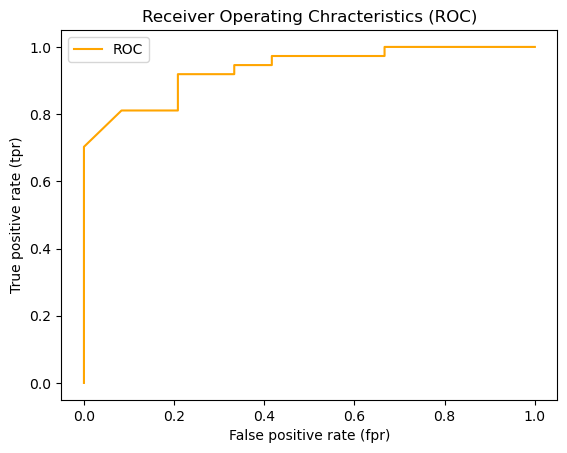

In [450]:
# Create a funciton for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")

    # Plot line with no predictive power (baseline)
    # plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Chracteristics (ROC)")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)


    

In [451]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9346846846846847

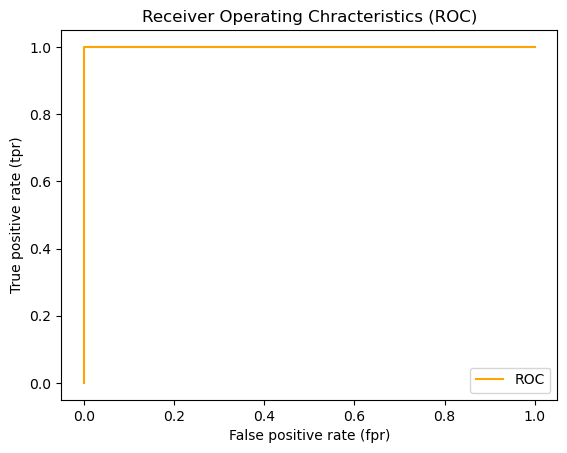

In [452]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

**3. Confusion matrix**
  
The next way to evaluate a classification model is by using a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.



In [458]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[21,  3],
       [ 7, 30]])

Again, this is probably easier visualized.

One way to do it is with `pd.crosstab()`.

In [475]:
# Visualize confuition matrix with pd.crosstab()

pd.crosstab(y_test, 
            y_preds,
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,21,3
1,7,30


In [477]:
21+7+3+30

61

In [476]:
len(X_test)

61

### Creating a confusion matrix using Scikit-Learn

![](../images/confusion-matrix.png)

Scikit-Learn has multiple different implementations of plotting confusion matrices:

1. [`sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator)- this takes a fitted estimator (like our clf model), features (X) and labels (y), it then uses the trained estimator to make predictions on X and compares the predictions to y by displaying a confusion matrix.

2. [`sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) - this takes truth labels and predicted labels and compares them by displaying a confusion matrix.


Note: Both of these methods/classes require Scikit-Learn 1.0+. To check your version of Scikit-Learn run:

import sklearn
sklearn.__version__
If you don't have 1.0+, you can upgrade at: https://scikit-learn.org/stable/install.html

In [483]:
import sklearn
sklearn.__version__

'1.3.0'

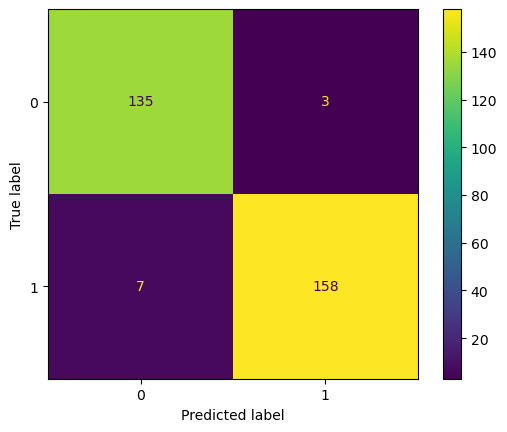

In [484]:
from sklearn.metrics import ConfusionMatrixDisplay


# Plot confusion matrix from estimator 
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

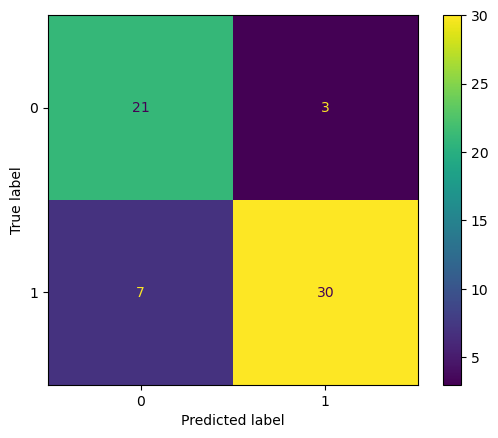

In [480]:
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);

**Classification Report**

In [486]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        24
           1       0.91      0.81      0.86        37

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.85      0.84      0.84        61



In [487]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)  # 10 people 
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

/Users/tmatin/Projects/ZTM-MachineLearningBootcamp/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tmatin/Projects/ZTM-MachineLearningBootcamp/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tmatin/Projects/ZTM-MachineLearningBootcamp/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


*To summarize classification metrics:*

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics
Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we're going to cover are:

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [496]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = housing_df.drop("target", axis=1)
y= housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [497]:
model.score(X_train, y_train)

0.973652044608591

In [498]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [499]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [500]:
y_test.mean()

2.0550030959302323

In [504]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [505]:
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [506]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [507]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

In [508]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [512]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae




0.3270458119670544

In [513]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.490580,0.013580
3024,0.45800,0.759890,0.301890
15663,5.00001,4.935016,-0.064994
20484,2.18600,2.558640,0.372640
9814,2.78000,2.334610,-0.445390
13311,1.58700,1.658080,0.071080
7113,1.98200,2.342370,0.360370
7668,1.57500,1.667080,0.092080
18246,3.40000,2.560960,-0.839040
5723,4.46600,4.851978,0.385978


In [529]:
# the mean value of the differences 
df["differences"].mean()

0.011913192441860052

In [528]:
# absolute mean value of differences 

# MAE using formulas and differences
np.abs(df["differences"].mean())

0.011913192441860052

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [531]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2542443610174998

In [532]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.490580,0.013580,0.000184
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


In [539]:
# Calculate MSE by hand

squared = np.square(df["differences"])
squared.mean()



0.2542443610174998

In [540]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16     # increase "squared_differences" for 1 sample

In [541]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.490580,0.013580,16.000000
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372
